In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
etf = pd.read_csv("ETF.csv", index_col=0, parse_dates=True)

after2007 = etf["2007":]

after2007.columns = ["VTI", "TLT", "SHY", "GLD", "GSG", "VNQ"]

after2007.columns

Index(['VTI', 'TLT', 'SHY', 'GLD', 'GSG', 'VNQ'], dtype='object')

In [17]:
rolling_corr = after2007.rolling(window=50).corr()

rolling_corr.dropna()

VTI       TLT       SHY       GLD       GSG       VNQ
date                                                                      
2007-03-15 VTI  1.000000 -0.593365 -0.548386  0.605344  0.114214  0.874822
           TLT -0.593365  1.000000  0.875945 -0.091643  0.430606 -0.558630
           SHY -0.548386  0.875945  1.000000  0.134672  0.511091 -0.400901
           GLD  0.605344 -0.091643  0.134672  1.000000  0.739066  0.767668
           GSG  0.114214  0.430606  0.511091  0.739066  1.000000  0.320217
...                  ...       ...       ...       ...       ...       ...
2022-12-30 TLT  0.575518  1.000000  0.827689  0.756757 -0.821346  0.711036
           SHY  0.591194  0.827689  1.000000  0.805307 -0.662278  0.658679
           GLD  0.473590  0.756757  0.805307  1.000000 -0.609124  0.622012
           GSG -0.213091 -0.821346 -0.662278 -0.609124  1.000000 -0.325928
           VNQ  0.932883  0.711036  0.658679  0.622012 -0.325928  1.000000

[23874 rows x 6 columns]

In [18]:
years = pd.date_range("2007","2022",freq='Y').strftime('%Y')
years

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [19]:
corr_values = rolling_corr.loc[:, ('VTI', 'TLT')]
corr_matrix = corr_values.unstack()

In [20]:
corr_matrix_T = corr_matrix.T
corr_matrix_T.index

MultiIndex([('VTI', 'GLD'),
            ('VTI', 'GSG'),
            ('VTI', 'SHY'),
            ('VTI', 'TLT'),
            ('VTI', 'VNQ'),
            ('VTI', 'VTI'),
            ('TLT', 'GLD'),
            ('TLT', 'GSG'),
            ('TLT', 'SHY'),
            ('TLT', 'TLT'),
            ('TLT', 'VNQ'),
            ('TLT', 'VTI')],
           )

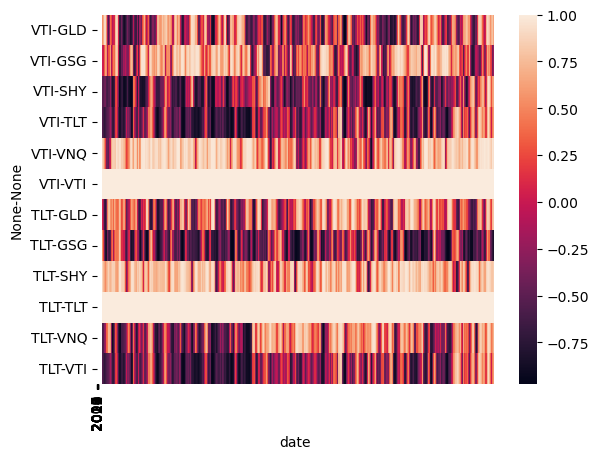

In [21]:
heatmap = sns.heatmap(corr_matrix_T, xticklabels=years)